# 신경망의 추론

## 미니배치 버전 파이썬 구현

In [ ]:
import numpy as np

W1 = np.random.rand(2, 4)

In [ ]:
W1

In [ ]:
b1 = np.random.rand(4)
print(b1.shape)

In [ ]:
b1

In [ ]:
x = np.random.rand(10, 2)

In [ ]:
x

In [ ]:
h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,)

In [ ]:
print(h.shape)
print(h)

## 시그모이드 함수

In [9]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

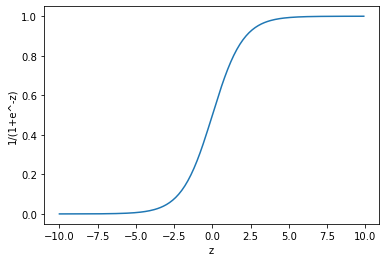

In [10]:
import matplotlib.pyplot as plt
zs = np.arange(-10., 10., 0.1)
gs = [sigmoid(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [11]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

x = np.random.rand(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.rand(4)
W2 = np.random.randn(4, 3)
b2 = np.random.rand(3)

h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,)
a = sigmoid(h)             # (10,4)
s = np.matmul(a, W2) + b2  # (10,4)(4,3)+(3,)

In [12]:
print(h.shape)
print(h)

(10, 4)
[[0.8553014  2.76836034 1.80286498 1.92281729]
 [1.05372473 2.93379865 1.14096827 1.78818822]
 [1.11550484 3.27028489 1.20938577 1.92589871]
 [0.98675273 2.96420884 1.44745131 1.88799337]
 [1.05749155 2.01249811 0.23793792 1.20293302]
 [0.98469625 2.60342805 1.10844193 1.66305989]
 [1.10674527 3.09967833 1.08130458 1.8289078 ]
 [0.90118879 1.75983273 0.64148051 1.23186582]
 [0.93142428 2.94954603 1.6623264  1.94536855]
 [0.8026725  1.41905579 0.72097741 1.13568253]]


In [13]:
print(a.shape)
print(a)

(10, 4)
[[0.70167805 0.94094194 0.85849733 0.87245227]
 [0.74148951 0.94949216 0.75785737 0.856705  ]
 [0.75315396 0.96339522 0.77019025 0.87279477]
 [0.72844605 0.95093076 0.80960588 0.86852657]
 [0.74221088 0.88210307 0.55920542 0.76904614]
 [0.72803906 0.93108188 0.75183852 0.84064833]
 [0.75152183 0.95687947 0.74674078 0.86163156]
 [0.71119374 0.85318871 0.65508806 0.77414497]
 [0.71736415 0.95024203 0.84055005 0.87494075]
 [0.69054587 0.80519035 0.67282221 0.75688606]]


In [14]:
print(s.shape)
print(s)

(10, 3)
[[-2.98121711  3.59079009 -0.65613741]
 [-3.11328059  3.51764656 -0.66345846]
 [-3.1728128   3.57397676 -0.68313227]
 [-3.07597304  3.57006241 -0.66690607]
 [-3.02145699  3.14826954 -0.55959853]
 [-3.04453932  3.45775522 -0.63607442]
 [-3.15642378  3.53136518 -0.67393771]
 [-2.89537494  3.16519283 -0.51222292]
 [-3.04178996  3.59837959 -0.66772711]
 [-2.78232752  3.06982966 -0.4343832 ]]


## 계층으로 클래스화 및 순전파 구현

### 파이썬 참조 계수

In [21]:
import sys
a = np.array([1,2,3])
print(a)
print( sys.getrefcount(a) )
b = a
print( sys.getrefcount(a) )
print(b)
b[1] = 10
print(b)
print(a)
del b
print( sys.getrefcount(a) )
del a

[1 2 3]
2
3
[1 2 3]
[ 1 10  3]
[ 1 10  3]
2


In [26]:
import sys

def foo():
    print('foo()')

foo()
print( sys.getrefcount(foo) )
bar = foo
print( sys.getrefcount(bar) )
bar()
del bar
print( sys.getrefcount(foo) )

foo()
2
3
foo()
2


In [27]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [28]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [29]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [30]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s.shape)
print(s)

(10, 3)
[[ 0.63231869  1.8247538  -1.91055016]
 [ 0.60851244  1.78650304 -2.06298803]
 [ 0.54268487  1.81842094 -1.97734915]
 [ 0.65426474  1.75676443 -2.14606798]
 [ 0.96710388  1.64500777 -2.50723559]
 [ 0.7419497   1.66130396 -2.34709801]
 [ 0.78262046  1.66131473 -2.38782792]
 [ 0.9324662   1.55512621 -2.61531737]
 [ 0.39087965  1.82469924 -1.91223653]
 [ 0.71468588  1.75026267 -2.16768738]]
